# Ejemplo visualización información RGBD


Se va a mostrar un ejemplo de código en el que se cargan unos datos provenientes de una cámara RGB-D y se visualizan.

Primero se cargan los datos ya almacenados en un archivo .mat

In [7]:
load('Datos\Datos_RGBD_camera.mat')

A continuación se muestra la imagen de color

In [8]:
figure, imshow(colorImage)


Inline plot failed, consider trying another graphics toolkit
error: print: figure must be visible or qt toolkit must be used with __gl_window__ property 'on' or QT_OFFSCREEN feature available
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



In [9]:
Se visualiza la imagen de profundidad obtenida

error: 'Se' undefined near line 1, column 1


ans = 1


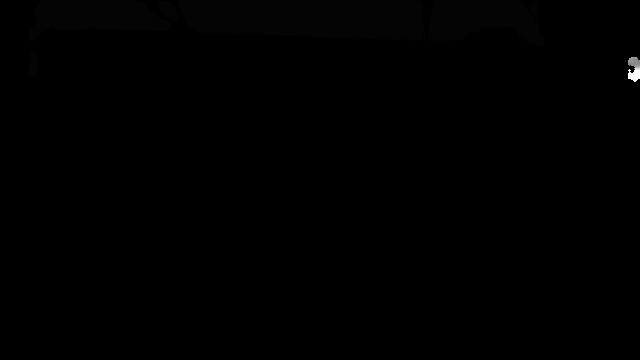

In [10]:
depthImage=depthMap/max(depthMap(:));
figure, imshow(depthMap,[0.2 0.5])

max(depthImage(:))


Se representa la nube de puntos

In [11]:
figure, plot3(nube_puntos(:,1),nube_puntos(:,2),nube_puntos(:,3),'.b')


Inline plot failed, consider trying another graphics toolkit
error: print: figure must be visible or qt toolkit must be used with __gl_window__ property 'on' or QT_OFFSCREEN feature available
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



Se hace un pequeño procesamiento de la nube de puntos

In [12]:
%%Eliminar puntos en el origen
index_puntos_sin_origen=find(~((nube_puntos(:,1)==0) & (nube_puntos(:,2)==0) &(nube_puntos(:,3)==0)));

pc_filt=nube_puntos(index_puntos_sin_origen,:);
figure, plot3(pc_filt(:,1),pc_filt(:,2),pc_filt(:,3),'.b')


Inline plot failed, consider trying another graphics toolkit
error: print: figure must be visible or qt toolkit must be used with __gl_window__ property 'on' or QT_OFFSCREEN feature available
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



In [13]:
%%Seleccionar ROI de la nube de puntos
% roi=[-1,1,-1,1,0,0.4];
ancho=0.3;
largo=0.4;
profundo=0.4;

roi=[-largo/2,largo/2,-ancho/2,ancho/2,0,profundo];


pc_roi = pc_filt((pc_filt(:,1)>roi(1) & pc_filt(:,1)<roi(2)) & (pc_filt(:,2)>roi(3) & pc_filt(:,2)<roi(4)) & (pc_filt(:,3)>roi(5) & pc_filt(:,3)<roi(6)),:);
figure, plot3(pc_roi(:,1),pc_roi(:,2),pc_roi(:,3),'.b')


Inline plot failed, consider trying another graphics toolkit
error: print: figure must be visible or qt toolkit must be used with __gl_window__ property 'on' or QT_OFFSCREEN feature available
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



Se visualiza la nube de puntos desde arriba

In [14]:
figure, plot3(pc_roi(:,1),pc_roi(:,2),pc_roi(:,3),'.b')
view(0,90)

Inline plot failed, consider trying another graphics toolkit
error: print: figure must be visible or qt toolkit must be used with __gl_window__ property 'on' or QT_OFFSCREEN feature available
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



Se visualiza la nube de puntos con color

In [15]:
color=pc_roi(:,4:6);
color(1:10,:)
xyz=pc_roi(:,1:3);

index=[1:size(color,1)];



marker_size=3;
figure
scatter3(xyz(:,1), xyz(:,2), xyz(:,3), marker_size, index,"filled")
colormap(color)
view(30,90)

ans =

   0.5765   0.6510   0.8353
   0.5843   0.6549   0.8431
   0.3098   0.3569   0.4392
   0.4196   0.4941   0.6941
   0.5961   0.6667   0.8431
   0.5451   0.6275   0.8510
   0.5255   0.6078   0.8314
   0.5294   0.6157   0.8392
   0.5216   0.6078   0.8392
   0.3608   0.4588   0.5569



Inline plot failed, consider trying another graphics toolkit
error: print: figure must be visible or qt toolkit must be used with __gl_window__ property 'on' or QT_OFFSCREEN feature available
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13

